<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_11_Pandas Explode.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [13]:
# Importing Libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert string representation to actual list, checking for NaN values first
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


## 🟨 Bar Plot of Top Skills for Cloud Engineers (2.11.1)

<Axes: xlabel='job_skills'>

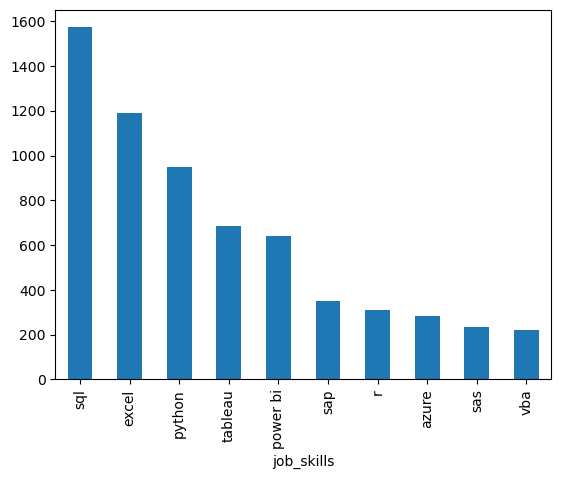

In [47]:
df_cloud = df.copy()
df_cloud = df_cloud[(df_cloud['job_title_short'] == 'Data Analyst') & (df_cloud['job_country'] == 'Poland')]
df_cloud = df_cloud.explode(column='job_skills')
df_cloud['job_skills'].value_counts().head(10).plot(kind='bar')

---

## 🟨 Average Salary by Skill (2.11.2)

In [ ]:
df_average = df.explode('job_skills').copy()


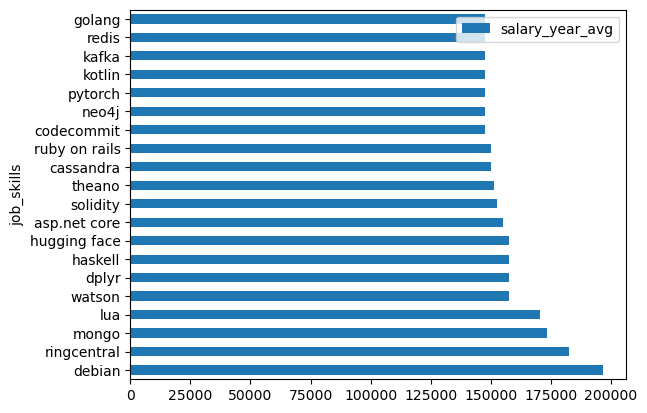

In [71]:
df_average_pivot = df_average.pivot_table(index='job_skills', values='salary_year_avg', aggfunc='median', dropna=True)
df_average_pivot
top_skills = df_average_pivot.sort_values(by='salary_year_avg', ascending=False).head(20).plot(kind='barh')

---

## 🟥 Unique Skills Count (2.11.3)

In [ ]:

df_exploded = df.explode('job_skills').copy()
df_exploded['job_skills'].value_counts()
df_exploded['job_skills'].sort_values().unique()


array(['airflow', 'airtable', 'alteryx', 'angular', 'angular.js',
       'ansible', 'apl', 'arch', 'asana', 'asp.net', 'asp.net core',
       'asp.netcore', 'assembly', 'atlassian', 'aurora', 'aws', 'azure',
       'bash', 'bigquery', 'bitbucket', 'blazor', 'c', 'c#', 'c++',
       'capacitor', 'cassandra', 'centos', 'chainer', 'chef', 'clickup',
       'clojure', 'cobol', 'codecommit', 'cognos', 'colocation',
       'confluence', 'cordova', 'couchbase', 'couchdb', 'crystal', 'css',
       'dart', 'databricks', 'datarobot', 'dax', 'db2', 'debian',
       'delphi', 'deno', 'digitalocean', 'dingtalk', 'django', 'dlib',
       'docker', 'dplyr', 'drupal', 'dynamodb', 'elasticsearch',
       'electron', 'elixir', 'ember.js', 'erlang', 'esquisse', 'excel',
       'express', 'f#', 'fastapi', 'fastify', 'fedora', 'firebase',
       'firestore', 'flask', 'flow', 'flutter', 'fortran', 'gatsby',
       'gcp', 'gdpr', 'ggplot2', 'git', 'github', 'gitlab', 'go',
       'golang', 'google chat', 'gr

---